In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("monarch.pgm", cv2.IMREAD_GRAYSCALE)
largura_imagem, altura_imagem = img.shape
import imageio

# Função para a criação dos padrões

In [3]:
def cria_padroes (M):
    padroes = []
    tam = (len(M)*len(M))+1
    for i in range(0,tam):
        padroes.append(np.zeros((len(M), len(M))))
    
    for i in range (0, len(M)):
        for j in range (0, len(M)):
            elem = M[i,j]
            for k in range (elem+1, tam):
                padroes[k][i,j] = 1
    
    
    return padroes

# Função que cria a nova imagem utilizando o método pontilhado ordenado

In [8]:
def half_toning(matriz_de_padroes):

    img_out = np.copy(img)
    tam_padrao = len(matriz_de_padroes)
    tam_equalizacao = (tam_padrao**2)-1
    mask = (tam_equalizacao/255.0) * img_out
    mask = np.ceil(mask)
    newImg = np.zeros((largura_imagem*tam_padrao,altura_imagem*tam_padrao))
    padroes = cria_padroes(matriz_de_padroes)
    #refere ao y da imagem que esta sendo criada
    k = 0
    #refere ao x da imagem que esta sendo criada
    l = 0
    
    print (altura_imagem)
    

    for j in range(0, altura_imagem):
        for i in range(0, largura_imagem):
            val = mask[i,j]
            pattern = padroes[int(val)]
            x_inicio = i + l
            x_fim = x_inicio + tam_padrao
            y_inicio = j + k
            y_fim = y_inicio + tam_padrao
            newImg[x_inicio:x_fim, y_inicio:y_fim] = pattern[:,:]

            l = l + tam_padrao - 1
        l = 0
        k = k + tam_padrao - 1


    
    plt.imshow(newImg, "gray")
    imageio.imwrite('resultados/padroes_'+str(tam_padrao)+'_1.png', newImg)

# Exemplo de execução da função half_toning
# É necessário passar como parâmetro a matriz que representa o padrão.

768


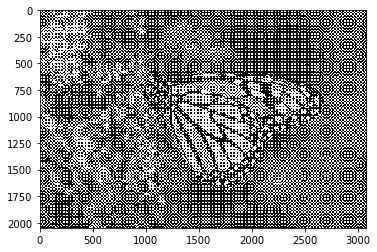

In [11]:
matriz_de_padroes = np.array([[6,8,4],[1,0,3],[5,2,7]])
matriz_de_padroes = np.array([[0,12,3,15],[8,4,11,7],[2,14,1,13], [10,6,9,5]])
half_toning(matriz_de_padroes)

# Função pontilhado_erro cria a imagem utilizando o método de pontilhado por difusão de erro. Recebe um parâmetro para indicar o tipo da varredura.

In [24]:
#Alternado é o parametro indicando se a varredura será igual o
#da figura 3(a), caso for true, ou igual a da figura 3(b), caso contrário

def pontilhado_erro (alternado = False):

    newImg = np.copy(img)
    for j in range(0,altura_imagem):
        i = 0
        incremento = 1
        sentido = 1
        if (alternado == False):
            if (j%2 == 1):
                i = largura_imagem-1
                incremento = -1
                sentido = -1
        while (i >= 0 and i < largura_imagem):
            val = newImg[i,j]
            erro = 0
            if (val > 128):
                erro = val-255
                newImg[i,j] = 255
            else:
                erro = val
                newImg[i,j] = 0

            if (erro == 0):  #Se o erro for 0, não tem nada para propagar
                i = i + incremento
                continue
            if (i+sentido < largura_imagem and i+sentido >= 0):
                #propaga o erro pra direita ou esquerda, dependendo do sentido
                newImg[i+sentido,j] = newImg[i+sentido,j] + (erro*7)//16
            if (j+1 >= altura_imagem): #Testa se está na ultima linha da matriz
                i = i  + incremento
                continue
            if (i-1 >= 0): #Testa se está na primeira coluna, ou seja, i == 0
                newImg[i-1,j+1] = newImg[i-1,j+1] + (erro*3)//16
            newImg[i,j+1] = newImg[i,j+1] + (erro*5)//16
            if (i+1 < largura_imagem): #Testa se está na ultima coluna
                newImg[i+1,j+1] = newImg[i+1,j+1] + (erro)//16

            i = i + incremento  #incrementa ou decrementa, dependendo do valor em incremento

    plt.imshow(newImg, "gray")
    #imageio.imwrite('resultados/difusão_erros_1_2.png', newImg)

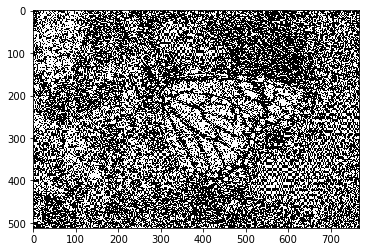

In [25]:
pontilhado_erro()